## Analyzing generated dataset

### Import data

In [1]:
import os
import sys
project_root = os.path.dirname(os.path.abspath(''))
sys.path.insert(0, project_root)
sys.path.insert(0, os.path.join(project_root, 'model'))
sys.path.insert(0, os.path.join(project_root, 'dataset_generation'))

from importlib import reload
import analysis_util
import util
reload(analysis_util)
reload(util)

from analysis_util import analyze_outliers, plot_value_distributions, analyze_sequences, analyze_syntax_tokens, plot_values
from data_util import load_dataset, create_dataloader
import pandas as pd
import numpy as np
import torch

In [19]:
datapath = '/Users/luis/Desktop/Cranmer 2024/Workplace/smallMutations/similar-expressions/data'
syntax, consts, values, val_x, syntax_cats = load_dataset(datapath, 'dataset_240822_1')

min_, max_ = np.arcsinh(values.min()), np.arcsinh(values.max())
value_transform = lambda x: 2 * (torch.arcsinh(x) - min_) / (max_ - min_) - 1  # Center in range

val_transformed = value_transform(torch.tensor(values)).detach().numpy()

In [20]:
from data_util import calc_priors_and_means, load_wandb_model, create_dataloader_from_wandb

model, cfg_dict, cfg = load_wandb_model(run='r20n7uoe')
train_loader, test_loader, info = create_dataloader_from_wandb(cfg_dict, cfg)

priors, means = calc_priors_and_means(train_loader)

/Users/luis/Desktop/Cranmer 2024/Workplace/smallMutations/similar-expressions/src/model/data_util.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.lo

Using updated value decoder 2.0!


In [21]:
priors

{'syntax_prior': np.float32(1.4003801),
 'consts_prior': np.float32(0.06443715),
 'values_prior': tensor(0.0110)}

### Analyze dataset

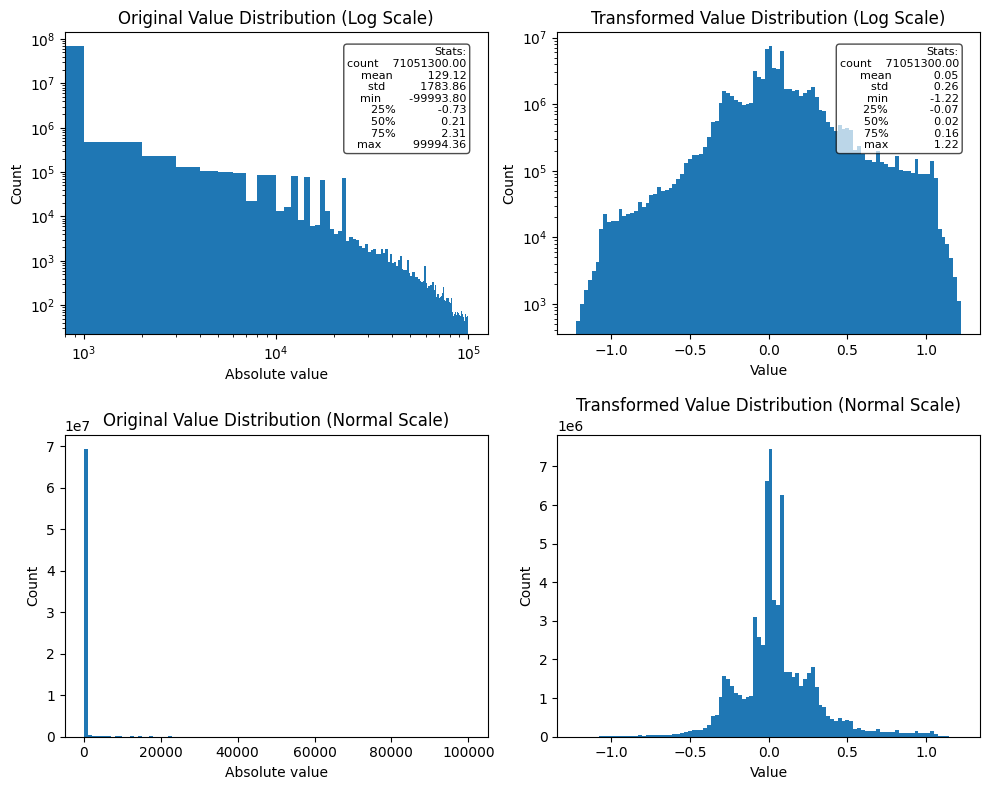

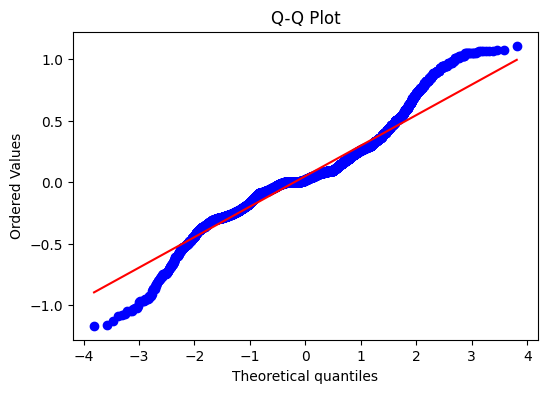

Number of outliers detected using z-score method: 1549966
Number of outliers detected using IQR method: 5416244


In [5]:
plot_value_distributions(values, val_transformed)
analyze_outliers(val_transformed)

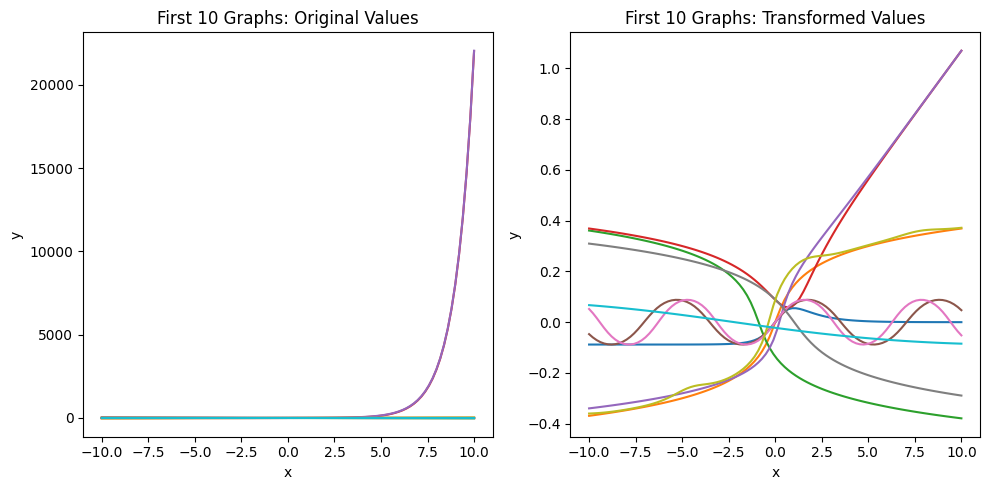

In [17]:
plot_values(val_x, values, val_transformed, idx=np.arange(0, 10))

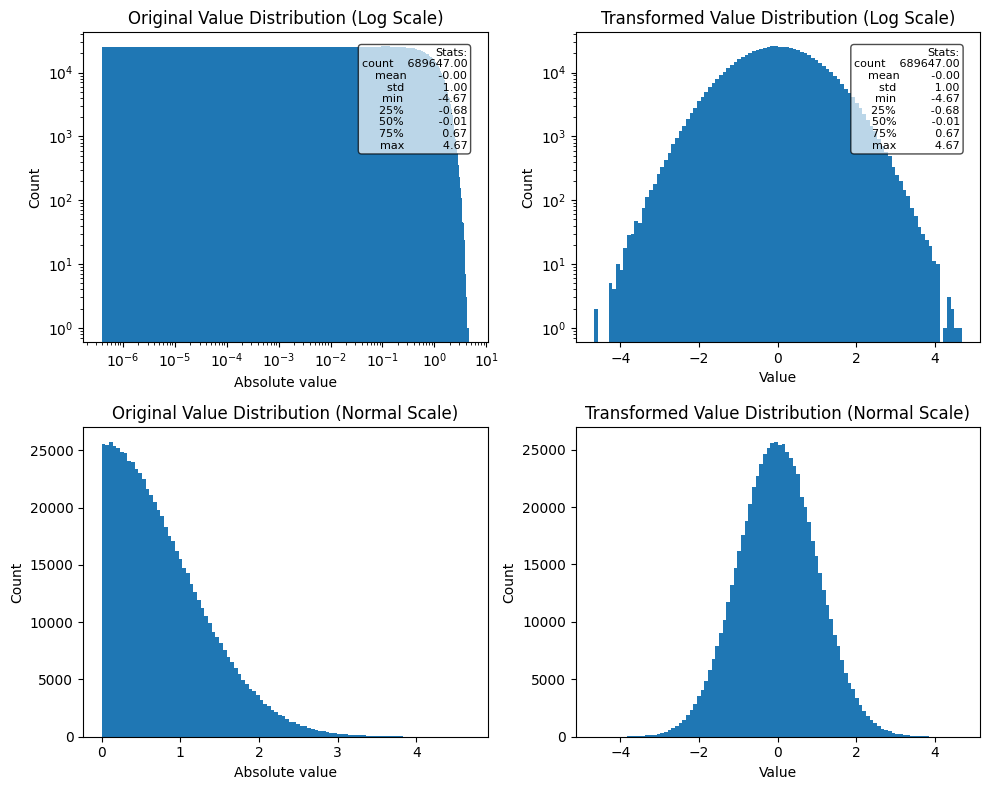

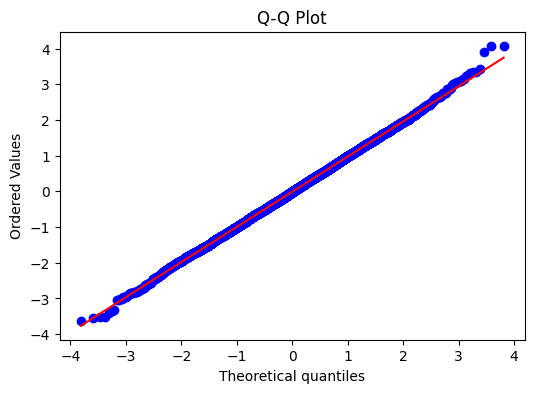

Number of outliers detected using z-score method: 1918
Number of outliers detected using IQR method: 4902


In [10]:
mask = (syntax[:, :, syntax_cats.index('CON')] == 1)
active_consts = consts[mask]

plot_value_distributions(active_consts, active_consts)
analyze_outliers(active_consts)

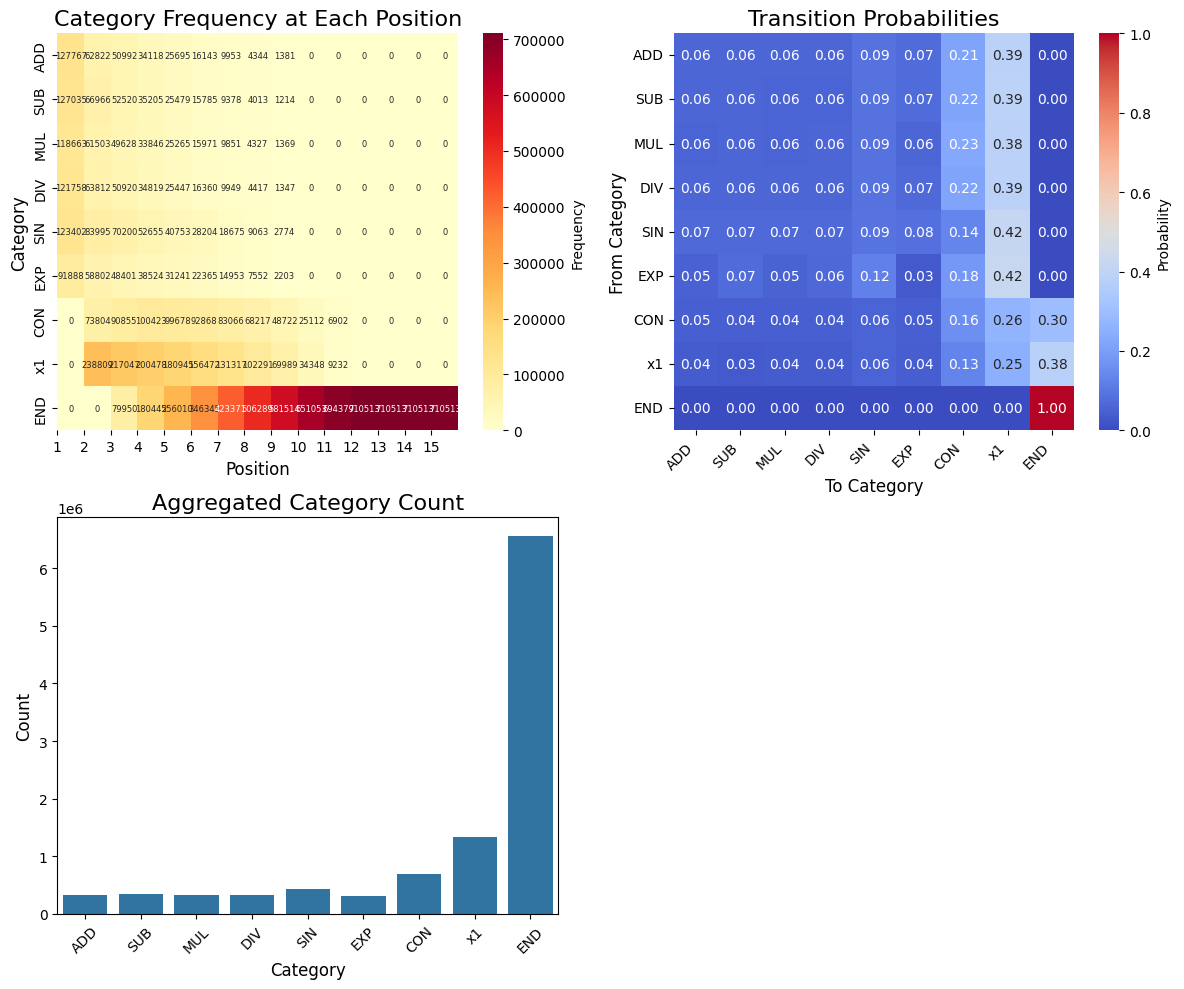

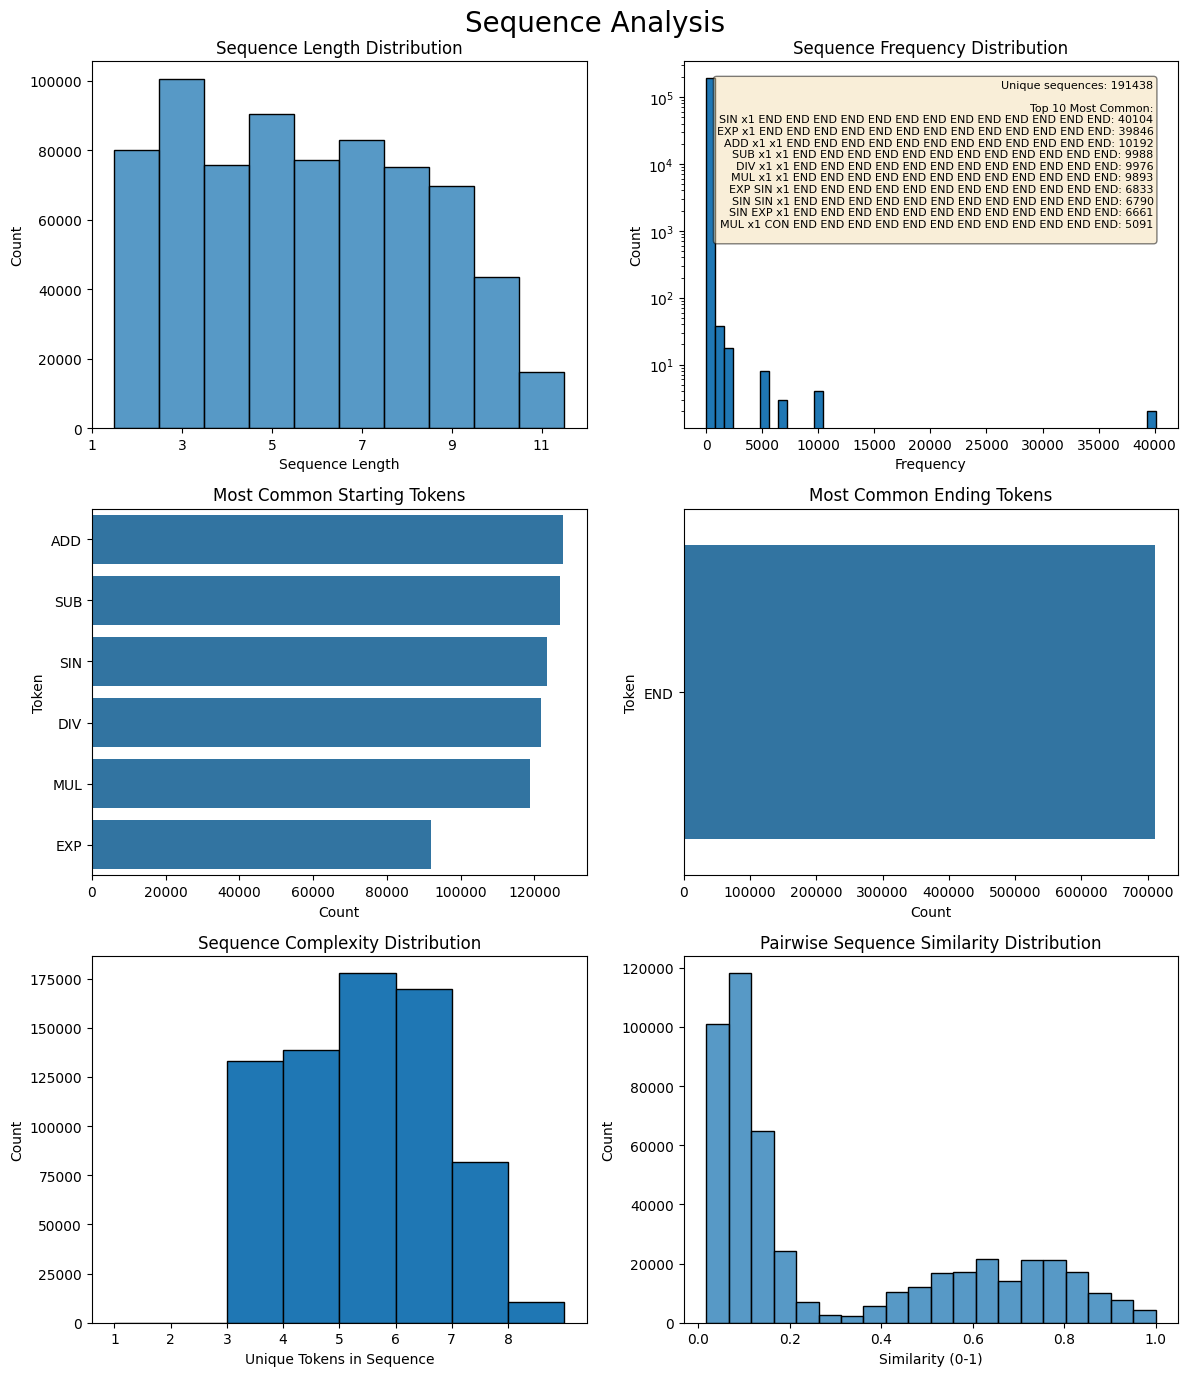

In [11]:
analyze_syntax_tokens(syntax, syntax_cats)
analyze_sequences(syntax, syntax_cats)